In [12]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [13]:
columns = ['name', 'sex', 'births']
pieces = []
years = range(1880, 2014)

for year in years:
    path = r'C:\Users\bharder\Dropbox\Ben\Python\Babynames\yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

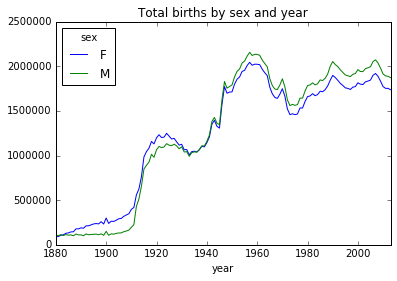

In [14]:
total_births = names.pivot_table('births', index ='year', columns ='sex', aggfunc=sum)

#plot the total births by year
total_births.plot(title='Total births by sex and year')

In [16]:
#Create a function to get the top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
#Get the most popular names for boys and girls
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
#aggregate the data frame
total_births = top1000.pivot_table('births', index ='year', columns='name',aggfunc=sum)

Zoe


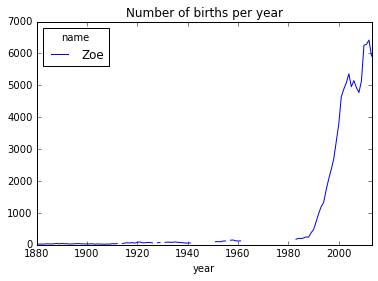

In [18]:
#Create a subset a single name
subset = total_births[[raw_input()]]
subset.plot(title="Number of births per year")

Keegan
Maddox
Beau


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D4A0230>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D3717B0>], dtype=object)

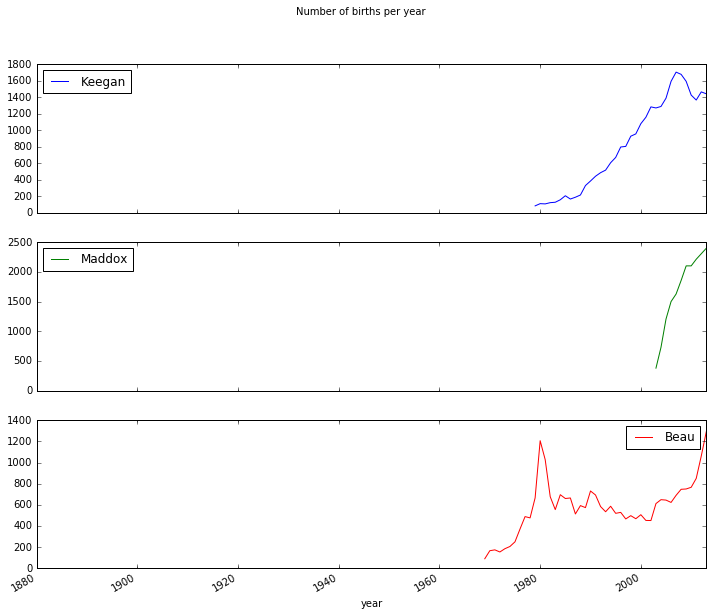

In [7]:
#Create a subset of the family names
subset = total_births[[raw_input(),raw_input(),raw_input()]]
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

In [19]:
top1000.head()

name sex  births  year
year sex                               
1880 F   0       Mary   F    7065  1880
         1       Anna   F    2604  1880
         2       Emma   F    2003  1880
         3  Elizabeth   F    1939  1880
         4     Minnie   F    1746  1880